<a href="https://colab.research.google.com/github/MunipsJe/HOST/blob/main/MINI_FOOD_IMAGE_CALSSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Working with own data set or Custom data into pytorch

In [3]:
#Import libraries
import torch
from torch import nn

1.Get data


Data Set is subset of Food101 dataset, and make it custom for 3 class of food that is 10% of total images.

In [4]:
import requests
import zipfile
from pathlib import Path

#Setup folder
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

#if the image folder doesn't exist download it nad prepare it...
if image_path.is_dir():
  print(f"{image_path} direcctory already exists ....skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi does not exist, creating one...


In [5]:
#Downalod pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading the file...")
  f.write(request.content)


#Unzip the pizza data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("unzippping piza data...")
  zip_ref.extractall(image_path)

unzippping piza data...


In [6]:
#Becoming one with data(data preparation and data exploration)
import os
def walk_through_dir(dir_path):
  """walks thriugh dir_path returning it commits"""
  for dirpath, dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [8]:
#setup train and testing path
test_dir=image_path/"test"
train_dir=image_path/"train"
test_dir, train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

data/pizza_steak_sushi/train/sushi/1615453.jpg
sushi
random image path  :data/pizza_steak_sushi/train/sushi/1615453.jpg
Image class:sushi
Image height : 384
Image width :384


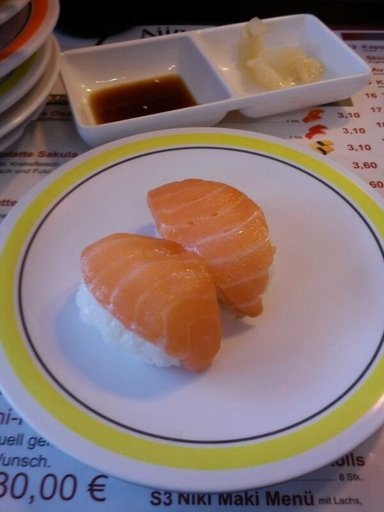

In [9]:
#Visualizing and image
import random
from PIL import Image

#Set seed
#random.seed(42)

#get all image path
image_path_list=list(image_path.glob("*/*/*.jpg")) # Stciking together

#picking random image
random_image_path= random.choice(image_path_list)
print(random_image_path)

# get the image class from path name (the image class is the name of dir where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# open image
img = Image.open(random_image_path)

#print meta data
print(f"random image path  :{random_image_path}")
print(f"Image class:{image_class}")
print(f"Image height : {img.width}")
print(f"Image width :{img.width}")
img

In [10]:
#try to visualize the image with matplot lib
import numpy as np
import matplotlib.pyplot as plt

#turn the image to array
img_as_array =np.asarray(img)

(np.float64(-0.5), np.float64(383.5), np.float64(511.5), np.float64(-0.5))

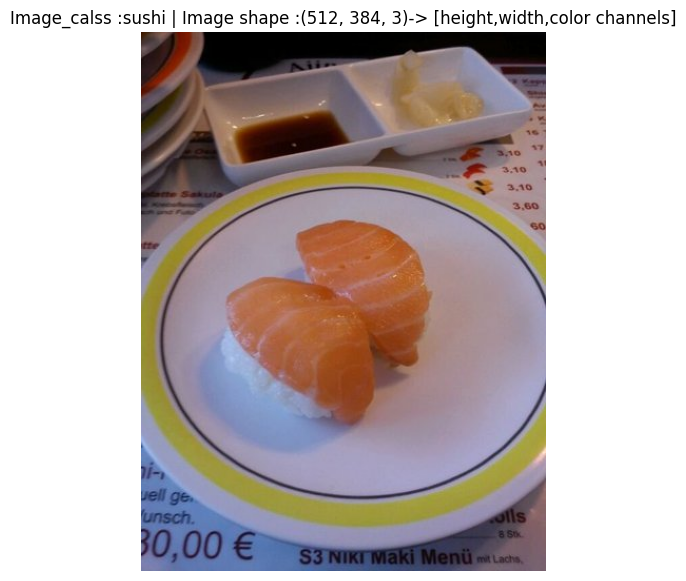

In [11]:
#plot the image with matplot
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image_calss :{image_class} | Image shape :{img_as_array.shape}-> [height,width,color channels]")
plt.axis(False)

Transforming data into tensor format


1.turn your target into tensors

2.turn into 'torch.utils.data.Dataset ' and subsequently a 'torch.utils.data.Dataloader'

In [12]:
 import torch
 from torch.utils.data import DataLoader
 from torchvision import datasets, transforms

transforming data with torchvision .transforms

In [13]:
#Write a transform for image
data_transform = transforms.Compose([
    #Resize the images to 64 x 64
    transforms.Resize(size=(64,64)),
    #Flip image randomly  on horizaontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into torch  tensor
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.0118, 0.0039, 0.0039,  ..., 0.3961, 0.3098, 0.2627],
         [0.0039, 0.0039, 0.0039,  ..., 0.2863, 0.3176, 0.3294],
         [0.0157, 0.0157, 0.0157,  ..., 0.1725, 0.2275, 0.3216],
         ...,
         [0.4902, 0.4824, 0.4706,  ..., 0.3098, 0.3412, 0.3373],
         [0.4784, 0.4745, 0.4627,  ..., 0.3765, 0.4431, 0.4392],
         [0.4706, 0.4706, 0.4588,  ..., 0.4667, 0.4784, 0.4824]],

        [[0.0118, 0.0039, 0.0039,  ..., 0.3020, 0.2275, 0.1647],
         [0.0039, 0.0039, 0.0039,  ..., 0.2235, 0.2549, 0.2588],
         [0.0078, 0.0078, 0.0118,  ..., 0.1020, 0.1569, 0.2471],
         ...,
         [0.3804, 0.3804, 0.3725,  ..., 0.3255, 0.3216, 0.2902],
         [0.3804, 0.3843, 0.3765,  ..., 0.3843, 0.4627, 0.4392],
         [0.3843, 0.3882, 0.3765,  ..., 0.4941, 0.4980, 0.4980]],

        [[0.0157, 0.0118, 0.0078,  ..., 0.2745, 0.1922, 0.0980],
         [0.0000, 0.0000, 0.0000,  ..., 0.2235, 0.2627, 0.2549],
         [0.0000, 0.0039, 0.0039,  ..., 0.0863, 0.1647, 0.

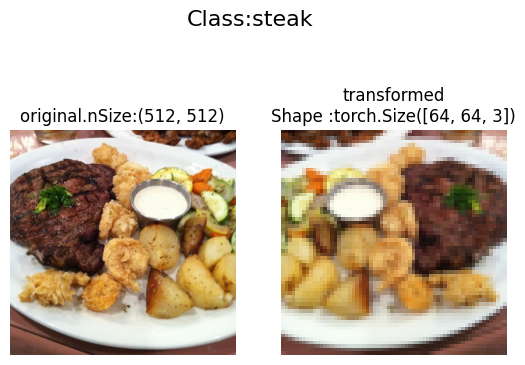

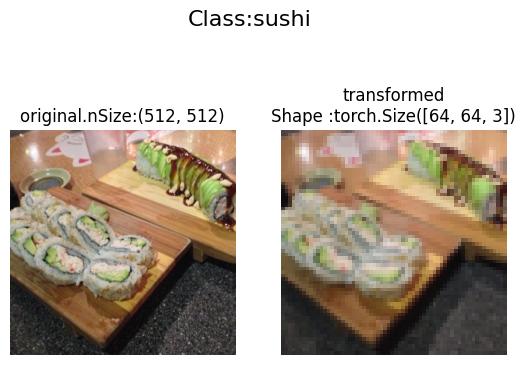

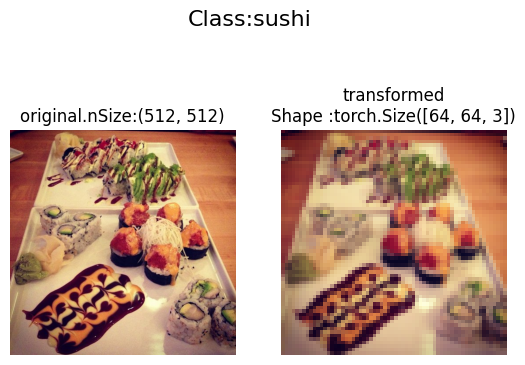

In [15]:
def plot_transformed_images(image_paths,transform, n=3,seed=42):
  """
  selects the ranfom image and loads/transform then the plots the original vs the transformed version
  """
  if seed :
    random.seed(seed)
  random_image_paths= random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path)  as f :
      fig, ax =plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original.nSize:{f.size}")
      ax[0].axis(False)

      #transform and plot the target image
      transformed_image =transform(f).permute(1,2,0)# assinged to change the order of image params
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed\nShape :{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class:{image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3, seed=42)

In [16]:
## Loading image data using image folder
# We can load image classification data using torchvision.datasets.ImageFolder

In [98]:
#use image folder to create datasets
from torchvision import datasets
train_data=datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,#transform for the data
    target_transform= None # a transform for the label/target
)

test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

In [18]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [19]:
#get class name as list
class_names= train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
#get the class name as dic
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
#check the len of dataset
len(train_data), len(test_data)

(225, 75)

In [22]:
#index on th train data dataset
img, label = train_data[0][0],train_data[0][1]
print(f"Image tensor:{img}")
print(f"Image shape:{img.shape}")
print(f"Label:{label}")
print(f"Label shape:{type(label)}")

Image tensor:tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.015

orignal shape:torch.Size([3, 64, 64])
After permute shape:torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

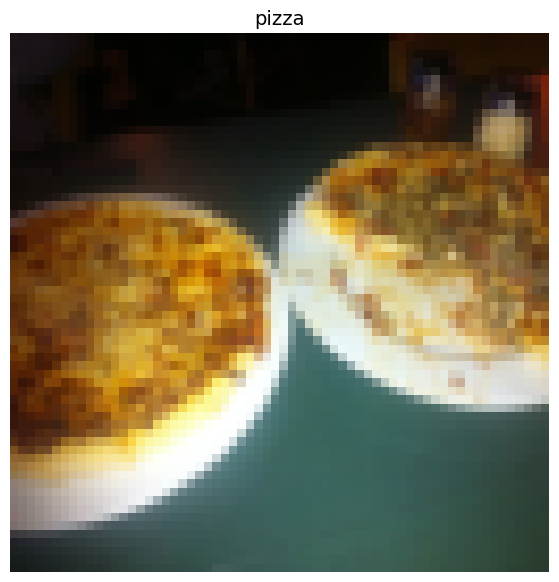

In [23]:
#rearrange the order of dimension bcs for Matplot
img_permute=img.permute(1,2,0)


#print out dffrnt shape
print(f"orignal shape:{img.shape}")
print(f"After permute shape:{img_permute.shape}")

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

In [24]:
#Bacthing the image with dataloader
#A data loader help turndatasets into iterable and can custoise the batch
#And model can see batch size image at a time reduce the memory run out

In [25]:
#Truning train and test data set into data loader
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(
     dataset=train_data,
     batch_size=BATCH_SIZE,
     num_workers = 1,
     shuffle=True
 )

test_dataloader=DataLoader(
     dataset=test_data,
     batch_size= BATCH_SIZE,
     num_workers=1,
     shuffle=False
 )

test_dataloader, train_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7830aaccb210>,
 <torch.utils.data.dataloader.DataLoader at 0x7830aae39c90>)

In [26]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [27]:
img,label=next(iter(train_dataloader))

#Print out the bacth size
print(f"Img shape :{img.shape}")
print(f"lable shape :{label.shape}")

Img shape :torch.Size([1, 3, 64, 64])
lable shape :torch.Size([1])


In [28]:
#Loading image data with custom dataset
#1.Want to be able to laod image from file
#2.Want to bale to get class name from data set
#3.Want to able to get the class as dict from the data set

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [30]:
#instance of torchvision.datasets.Imagefolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [31]:
#Creating a Custom function as helper function to get class names
#get the class names using os.scandir() to traver dirctry
#raise error fi calss name aren't found
#Turn the clas names into dict and list and return them

In [32]:
#Setup the target directory
target_directory=train_dir
print(f"target_directory:{target_directory}")

#get the class name fro target dirc
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target_directory:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [33]:
#A function with dirctry
def find_classes(directory: str) -> Tuple[List[str],Dict[str,int]]:
  """ Finds the class folder names in a target dirctory """
  #get the class name in the target dirctory
  classes= sorted(entry.name for entry in os.scandir(directory ) if entry.is_dir())

  #Raise an error if class name not found
  if not classes:
    raise FileNotFoundError(f"No class in Dirc {directory}....please check")


  #3.Create a dictionary of index lables (computers prefer number rather than string as labels)
  class_to_idx ={class_name : i for i , class_name in enumerate(classes)}
  return classes , class_to_idx

In [34]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [35]:
##Create a custaom data set to replicate the Image folder
#Subclass torch.utils.data.Dataset
#init our subclass with target dirctory from where we need to transform data
#Create serval attribute
# path- where the data comes
#transform- trasnform perform on daa
#class - lst of classes
#Covert the class to dict
#Create a function 'load_image()' open the image
#overwrite the len  '__len()__ method  to retrun the len of dataset
#overwirte the __getitem()__ to return the given sample when index is passed

In [36]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [37]:
# Create transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [38]:
# test our image folder cutom
train_data_custom=ImageFolderCustom(
    targ_dir=train_dir,
    transform=train_transforms
)

test_data_custom=ImageFolderCustom(
    targ_dir=test_dir,
    transform= test_transforms
)

In [39]:
random.sample(range(len(train_data_custom)),k=10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

In [40]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7830aaba1790>,
 <__main__.ImageFolderCustom at 0x7830aac87c50>)

In [41]:
# Chck for quality betwn original Image folder and custom image folder

print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == train_data.classes)

True
True


#create a function to display random images
1. take in data set and numbe of other paramerters such as class names and  many images to visualize

2.To prevent the displat getting out of hand , lets cap the number fo images to see at 10.
3. set the random seed for reproducibility
4. get a list of random sample idexes from the targe dataset
5.Setup matplotlib plot
6. Loop thriugh the randm smple index and plot in matplot
7.make sure the dim of image line with matplot

In [42]:
#Create a function to take in data set
def display_random_image(dataset: torch.utils.data.Dataset,
                         classes : List[str] = None,
                         n: int=10,
                         display_shape: bool = True,
                         seed: int=None):
  #2.adjust the display
  if n>10:
    n=10
    display_shape= False
    print(f" for disply purpse shold'nt be > 10 ")
  # set the seed
  if seed:
    random.seed(seed)
  # get random samples indexes
  random_sample_idx =random.sample(range(len(dataset)),k=n)

  # Setup plot
  plt.figure(figsize=(16,8))

  #Loop thrugh random index and plot in matploe
  for i , targ_sample in enumerate(random_sample_idx):
    targ_image,targ_label =dataset[targ_sample][0], dataset[targ_sample][1]

    #adjust the tensor dim for plotting
    targ_image_adjust=  targ_image.permute(1,2,0) # interhcnage the colur channels

    #plot for ajdusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis=("off")
    if classes :
      title= f"class:{classes[targ_label]}"
      if display_shape:
        title= title+f"\n shape:{targ_image_adjust.shape}"
    plt.title(title)

In [43]:
random.sample(range(len(train_data_custom)),k=10)

[108, 8, 7, 23, 55, 59, 129, 154, 6, 143]

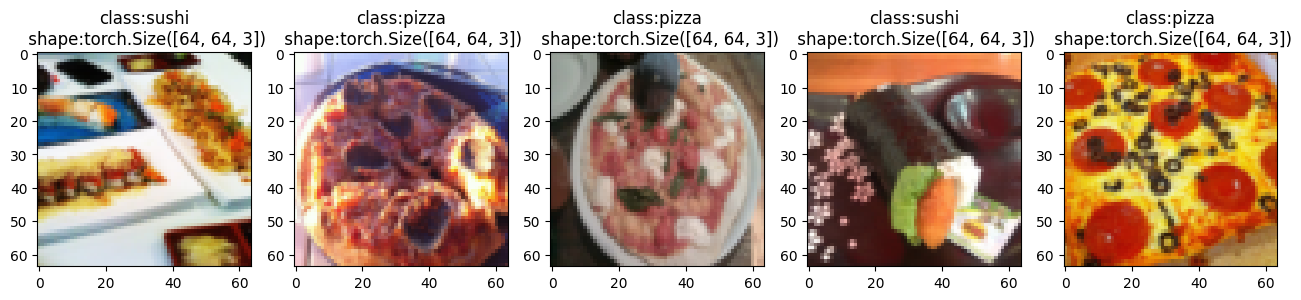

In [44]:
# Display random image from image folder created data set
display_random_image(train_data, n=5,classes=class_names, seed=42)

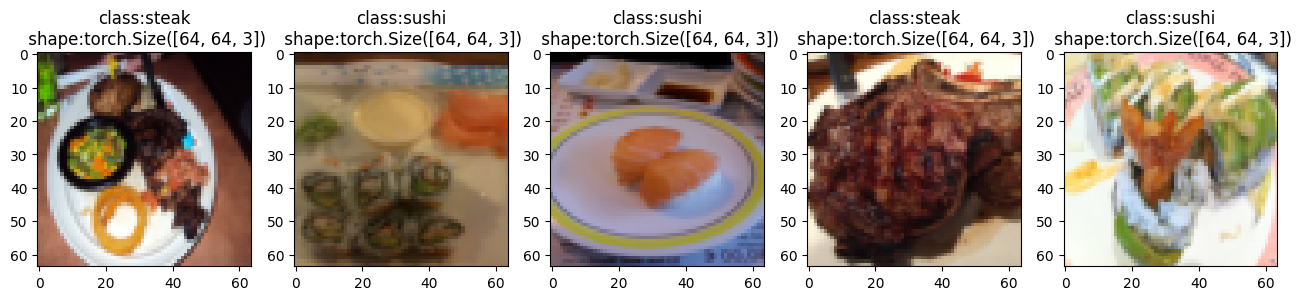

In [45]:
# Display random image from image folder created  custom data set
display_random_image(train_data_custom, n=5,classes=class_names, seed=42)

In [46]:
from torch.utils.data import DataLoader
test_dataloader_custom=DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=0,
    shuffle=True
)


test_dataloader_custom=DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=0,shuffle=False
)

test_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7830aa442510>,
 <torch.utils.data.dataloader.DataLoader at 0x7830aa442510>)

In [47]:
#get image and label
img_custom,label_custom=next(iter(test_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

# Other forms of transform (data augmentation)

Data augementation is the process of
Visalizing the image at  different prespective

In [48]:
# we use triviaaugment augmentation of images
from torchvision import transforms

train_transforms = transforms.Compose([
                                     transforms.Resize(size=(224,224)),
                                     transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                     transforms.ToTensor()])


test_transforms =transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()])

In [49]:
# get the image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1245193.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/343036.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg')]

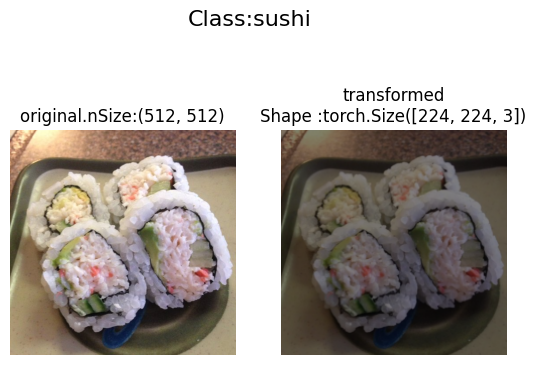

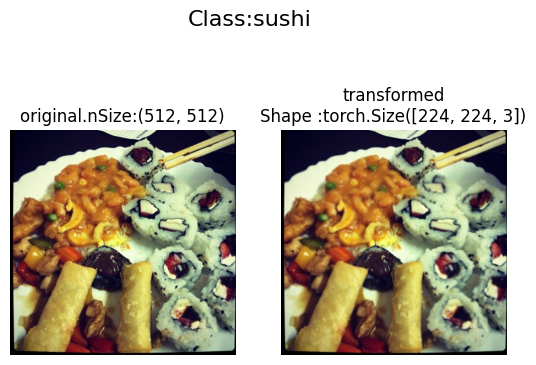

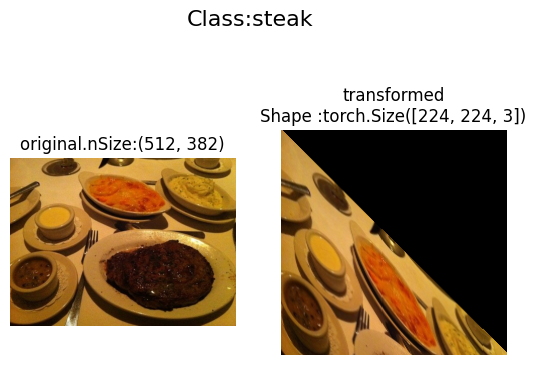

In [50]:
#plot random transformed images
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=3, seed= None )


In [51]:
# Model 0:Tinyvgg wihtout data augmentatio
# Cretating transforms and loading data for Model0

In [52]:
# Create the simple transform
simple_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])

In [53]:
# Import the data and transform
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                          transform=simple_transform)
test_data_simple=datasets.ImageFolder(
     root=test_dir,
     transform=simple_transform
 )

In [54]:
#Make the datasets into dataloader
import os
from torch.utils.data import DataLoader

#Setup bacth sie and number of works
BATCH_SIZE=32
NUM_WORKERS= os.cpu_count()

#Crete data loaders
train_dataloader_simple= DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_simple= DataLoader(
    dataset=test_data_simple, batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS)

In [55]:
# Pytorch tinyvgg model class
class TinyVGG(nn.Module):

  """
  Model archtechture TinyVGGS from CNN explainer
  """
  def __init__(self,
               input_shape : int,
               hidden_units: int,
               output_shape : int )-> None:
               super().__init__()
               self.conv_block_1 = nn.Sequential(
                   nn.Conv2d(
                   in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=0),
                   nn.ReLU(),
                   nn.Conv2d(
                       in_channels= hidden_units,
                            out_channels =hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2,stride=2)

               )
               self.conv_block_2 = nn.Sequential(
                   nn.Conv2d(
                   in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=0),
                   nn.ReLU(),
                   nn.Conv2d(
                       in_channels= hidden_units,
                            out_channels =hidden_units,
                            kernel_size=3,
                            stride=1,
                            padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2,stride=2)

               )
               self.classifier = nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(
                       in_features=hidden_units*13*13,
                       out_features=output_shape
                   )
               )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)

    return x


In [56]:
# Setting up the model0
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [57]:
# Setting the hidden unit by passing one data
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [58]:
# try forward pass
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [59]:
# Get a summar of shapes going on model with torchinfo
# install torch info
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [60]:
#Create train step and test step fucntions

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer : torch.optim.Optimizer):

  #put the model to train
  model.train()

  #setup the loss and acc
  train_loss,train_acc=0,0

  #loop thriugh the dataloader
  for batch,(X,y) in enumerate(dataloader):

    #forward pass
    y_pred=model(X)

    #Calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss +=loss.item()


    #Optimzer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #optimizer step
    optimizer.step()

    #Calcutale the accuracy
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Djust metrics to get the average loss and acc per batch
  train_loss=train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc

In [61]:
##Create test step and test step functions

def test_step(model: torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):

   # put model in eval mode
  model.eval()

   #setup test loss , test acc
  test_loss,test_acc=0,0

   # turn on inference mode
  with torch.inference_mode():
    #loop thguh the batch
    for batch, (X,y) in enumerate(dataloader):
      #forward pass
      test_pred_logits=model(X)

      # Caclcute the loss
      loss= loss_fn(test_pred_logits,y)
      test_loss +=loss.item()

      #calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels== y).sum().item()/len(test_pred_labels))

      #Adjust the accruacy to get the average loss and accuracy per batch

    test_loss=test_loss/len(dataloader)
    test_acc=test_acc/len(dataloader)
    return test_loss, test_acc

In [62]:
# Combining the train and test fucntions
from tqdm.auto import tqdm

#1.Create a train function taht takes various params

def train(model:torch.nn.Module,
           train_dataloader ,
           test_dataloader ,
          optimizer ,
           loss_fn: nn.CrossEntropyLoss(),
           epochs:int=5):
  # Step 2 .Creat Empty result dictionary
  results = {"train_loss":[],
              "train_acc":[],
              "test_loss":[],
              "test_acc":[]}

  #step 3 loop through the training and testing for numbe of epochs
  for epoch in tqdm(range(epochs)):


    train_loss, train_acc = train_step(model=model,
                                       dataloader= train_dataloader,
                                       optimizer=optimizer,loss_fn=loss_fn)
    test_loss, test_acc =test_step(model=model,
                                   dataloader=test_dataloader,
                                   loss_fn=loss_fn)

    #print out whats happening
    print(f"Epoch:{epoch} | train_loss:{train_loss:.4f}| train_Acc:{train_acc:.4f} | test_loss:{test_loss:.4f}| test_acc:{test_acc:.4f}")


    #update the results in the result list
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #return the results
  return results

In [63]:
# Train and evalutae the model
torch.manual_seed(42)

#set number of epochs
epoch= 5


#recerate a instance of tinyvgg

model_0= TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes))


#setup loss func and optimizer

loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.0001)
#train model 0
model_0_results= train(
     model=model_0, train_dataloader=train_dataloader_simple,
     test_dataloader= test_dataloader_simple,
      optimizer=optimizer,
     loss_fn=loss_fn, epochs=epoch
 )


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | train_loss:1.0990| train_Acc:0.3047 | test_loss:1.0979| test_acc:0.2604
Epoch:1 | train_loss:1.0995| train_Acc:0.3047 | test_loss:1.0939| test_acc:0.3011
Epoch:2 | train_loss:1.0963| train_Acc:0.4258 | test_loss:1.0942| test_acc:0.5312
Epoch:3 | train_loss:1.0996| train_Acc:0.2812 | test_loss:1.0917| test_acc:0.5417
Epoch:4 | train_loss:1.0954| train_Acc:0.4141 | test_loss:1.0932| test_acc:0.5729


In [64]:
model_0_results

{'train_loss': [1.0990025252103806,
  1.0995465070009232,
  1.0962579399347305,
  1.0995588153600693,
  1.0953829884529114],
 'train_acc': [0.3046875, 0.3046875, 0.42578125, 0.28125, 0.4140625],
 'test_loss': [1.097915530204773,
  1.093885858853658,
  1.0942304531733196,
  1.0917378266652424,
  1.093165357907613],
 'test_acc': [0.2604166666666667,
  0.30113636363636365,
  0.53125,
  0.5416666666666666,
  0.5729166666666666]}

In [65]:
#plotting the loss cure of model0
 # model result keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [66]:
def plot_loss_curve(results: Dict[str,List[float]]):
  """
  pot the loss  and acc curve
  """
  # get the loss value of the results dict
  loss= results["train_loss"]
  test_loss=results["test_loss"]


  #get the accuracy values of results dic
  accuracy=results["train_acc"]
  test_accuracy=results["test_acc"]


  #Figure out epochs
  epochs=range(len(results["train_loss"]))


  #setup a plot
  plt.figure(figsize=(15,7))

  #plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()


   #plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_accuracy,label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

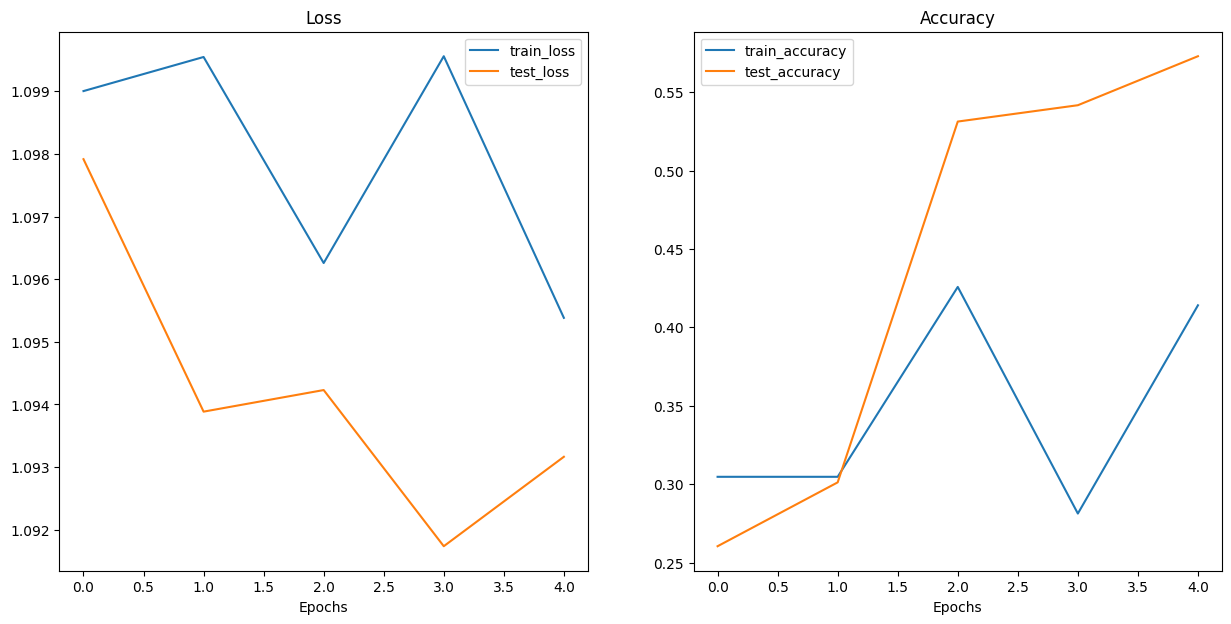

In [67]:
plot_loss_curve( model_0_results)

In [68]:
# to create another model1 with data augmentation
from torchvision import transforms

# Create transform with dataaugmentation
train_transform_trivial= transforms.Compose([transforms.Resize(size=(64,64)),
                                             transforms.TrivialAugmentWide(num_magnitude_bins=3),
                                             transforms.ToTensor()])

test_transform_trivial=transforms.Compose([transforms.Resize(size=(64,64)),
                                           transforms.ToTensor()])

In [69]:
# Create train and test datasets and dataloader with dataaugment
#image folder into datasets
train_data_augmented = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial)

test_data_augmented = datasets.ImageFolder(
    root= test_dir,
    transform=test_transform_trivial)

In [70]:
# Turn the datasets into dataloader
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()


torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset= train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle= True,
                                       num_workers= NUM_WORKERS)

test_dataloader_simple= DataLoader(
    dataset= test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)


In [71]:
# Construct  and train model 1 with augment data

torch.manual_seed(42)

model_1= TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)
)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [72]:
# Seting loss , optimizer then train and evalute the model

torch.manual_seed(42)
#Epochs
NUM_EPOCHS=5

#Loss func
loss_fn= nn.CrossEntropyLoss()


#Optimizer
optimizer= torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

#settup the train
model_1_results= train(model=model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader= test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS
                       )



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | train_loss:1.1040| train_Acc:0.2500 | test_loss:1.1011| test_acc:0.2604
Epoch:1 | train_loss:1.0772| train_Acc:0.4258 | test_loss:1.1307| test_acc:0.2604
Epoch:2 | train_loss:1.0683| train_Acc:0.4258 | test_loss:1.1685| test_acc:0.2604
Epoch:3 | train_loss:1.1340| train_Acc:0.3047 | test_loss:1.1591| test_acc:0.2604
Epoch:4 | train_loss:1.0866| train_Acc:0.4258 | test_loss:1.1522| test_acc:0.2708


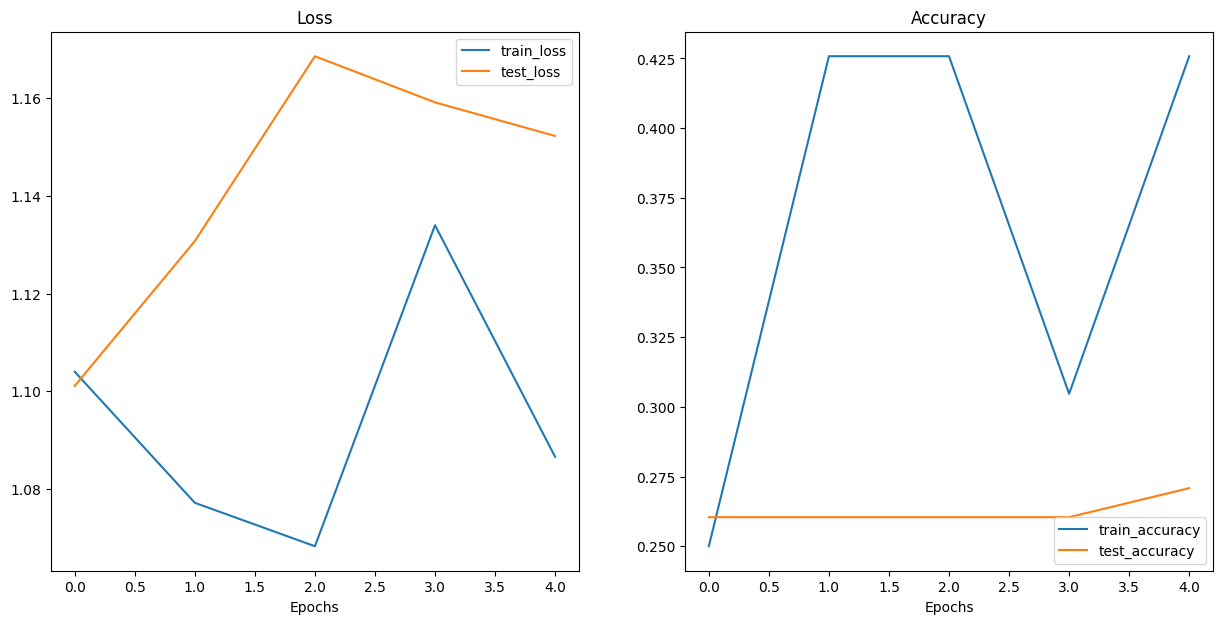

In [73]:
#plotting loss curve for model1

plot_loss_curve( model_1_results)

In [78]:
# Comparing the model result to each other
import pandas as pd
model_0_df= pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.099003,0.304688,1.097916,0.260417
1,1.099547,0.304688,1.093886,0.301136
2,1.096258,0.425781,1.094230,0.531250
3,1.099559,0.281250,1.091738,0.541667
4,1.095383,0.414062,1.093165,0.572917


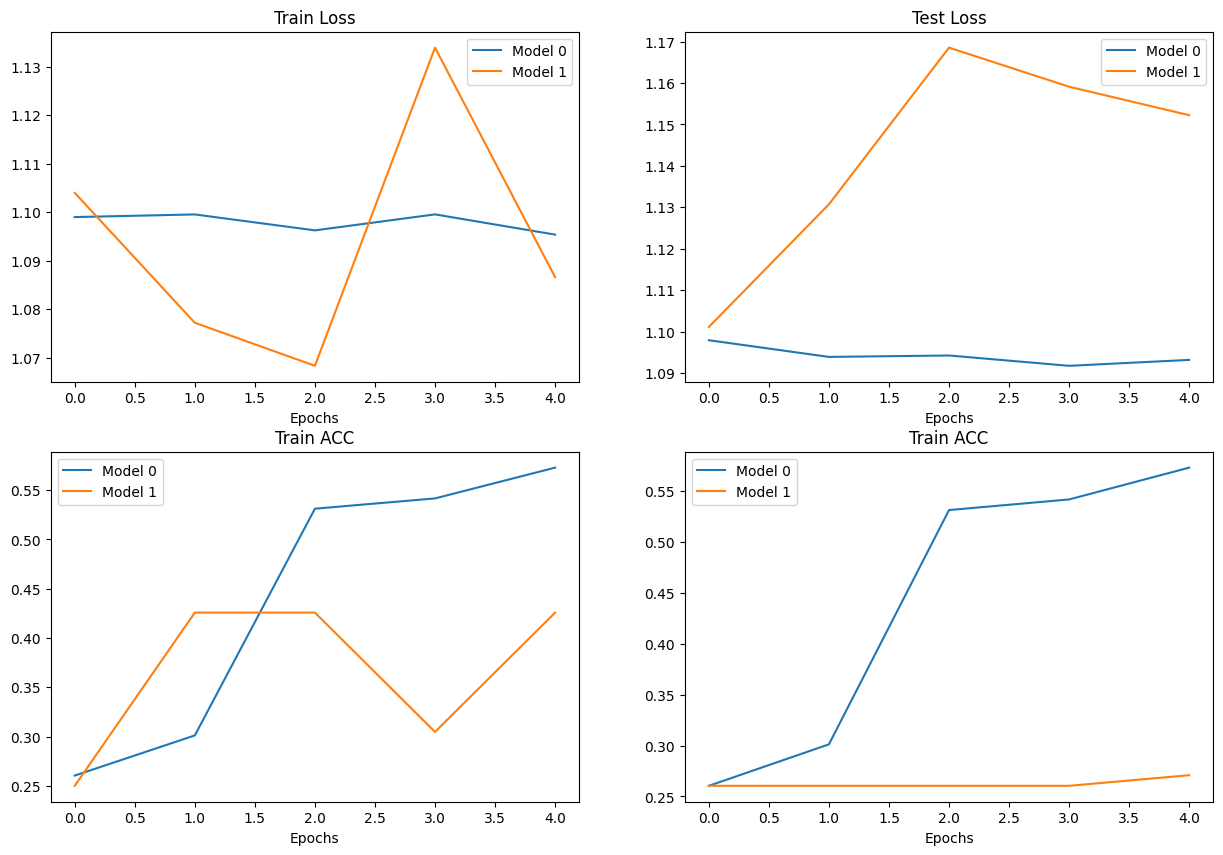

In [85]:
#setup subpot
plt.figure(figsize=(15,10))

#get number of epochs
epochs=range(len(model_0_df))

#plot train loss
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"], label=["Model 0"])
plt.plot(epochs,model_1_df["train_loss"],label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

#plot test loss
plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"], label=["Model 0"])
plt.plot(epochs,model_1_df["test_loss"],label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


#plot train acc
plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["test_acc"], label=["Model 0"])
plt.plot(epochs,model_1_df["train_acc"],label="Model 1")
plt.title("Train ACC")
plt.xlabel("Epochs")
plt.legend()

#plot train acc
plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"], label=["Model 0"])
plt.plot(epochs,model_1_df["test_acc"],label="Model 1")
plt.title("Train ACC")
plt.xlabel("Epochs")
plt.legend()

In [95]:
# making prediction on custom image
#Downlaod a custom image
import requests

#setup custom image path
custom_image_path=data_path/"04-pizza-dad.jpg"


#Download the image if it doesn.t already exist
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:

    #when downlaoding
    request =requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
    print(f"Downloading ")
    f.write(request.content)

else:
  print(f"{custom_image_path} already exist")

In [101]:
#Loading in custom image with pytorch and convert the custom in=mage to tensor form
import torchvision
# read in custom image
custom_image_uint8= torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

In [102]:
##checking the type of custom image
print(f"Custiom image shape:{custom_image_uint8.shape}")
print(f"Custiom image dtype:{custom_image_uint8.dtype}")

Custiom image shape:torch.Size([3, 4032, 3024])
Custiom image dtype:torch.uint8


In [103]:
# Compressing the image and prediction on the image
model_1.eval()
with torch.inference_mode():
  model_1_pred=model_1(custom_image_uint8.unsqueeze(dim=0))
model_1_pred

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [114]:
#Loading the custom image and compress to tensor
custom_image= torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.

In [115]:
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

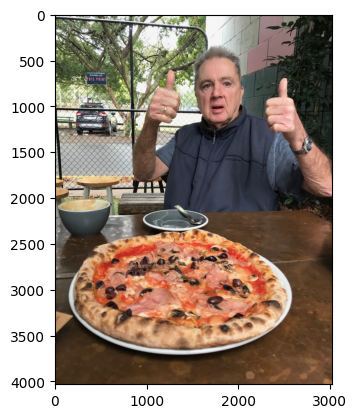

In [116]:
plt.imshow(custom_image.permute(1,2,0))

In [113]:
# Compressing the image and prediction on the image
model_1.eval()
with torch.inference_mode():
  model_1_pred=model_1(custom_image.unsqueeze(dim=0))
model_1_pred

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x7567650 and 1690x3)

In [124]:
# Create a transform pipe line to resize the image
from torchvision import transforms
custom_image_transform =transforms.Compose(
    [ transforms.Resize(size=(64,64))]
)


#trasnfrom the custom image
custom_image_transformed=custom_image_transform(custom_image)

# print the shape
print(f"original shape:{custom_image.shape}")
print(f"Custom image trasnformed shape:{custom_image_transformed.shape}")

original shape:torch.Size([3, 4032, 3024])
Custom image trasnformed shape:torch.Size([3, 64, 64])


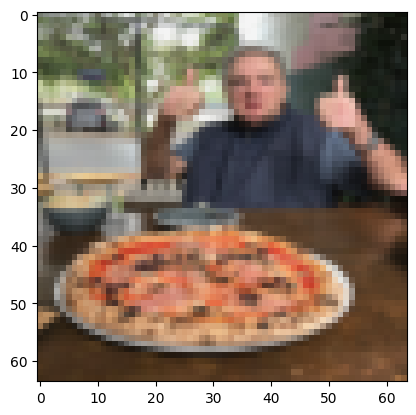

In [127]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [129]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed.unsqueeze(0))
custom_image_pred

tensor([[ 0.0911,  0.0196, -0.2048]])

In [130]:
#Convert logits (raw outcomes) to labels
custom_image_pred_probs=torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3738, 0.3480, 0.2781]])

In [131]:
# Conver the pred prob to labels
custom_image_pred_label=torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_label

tensor([0])

In [132]:
 class_names[custom_image_pred_label]

'pizza'